In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
print(penguins.shape)

(344, 7)


In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
num_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
penguins[num_cols] = penguins[num_cols].apply(lambda x: x.fillna(x.median()))


In [10]:
cat_cols = penguins.select_dtypes(include=['object', 'category']).columns
penguins[cat_cols] = penguins[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [11]:
print('Duplicates before: ', penguins.duplicated().sum())

Duplicates before:  0


In [12]:
penguins.drop_duplicates(inplace=True)

In [13]:
print('Duplicates after: ', penguins.duplicated().sum())

Duplicates after:  0


In [14]:
Q1 = penguins['bill_length_mm'].quantile(0.25)
Q3 = penguins['bill_length_mm'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

penguins['bill_length_mm'] = np.where(penguins['bill_length_mm'] > upper, upper,
                                      np.where(penguins['bill_length_mm'] < lower, lower, penguins['bill_length_mm']))


In [15]:
penguins['sex'] = penguins['sex'].map({'Male': 1, 'Female': 0})

In [16]:
penguins = pd.get_dummies(penguins, columns=['species', 'island'], drop_first=True)

In [17]:
penguins.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

In [19]:
penguins['bill_ratio'] = penguins['bill_length_mm'] / penguins['bill_depth_mm']

In [20]:
penguins['body_mass_index'] = penguins['body_mass_g'] / (penguins['flipper_length_mm'] ** 2)


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(
    penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
)


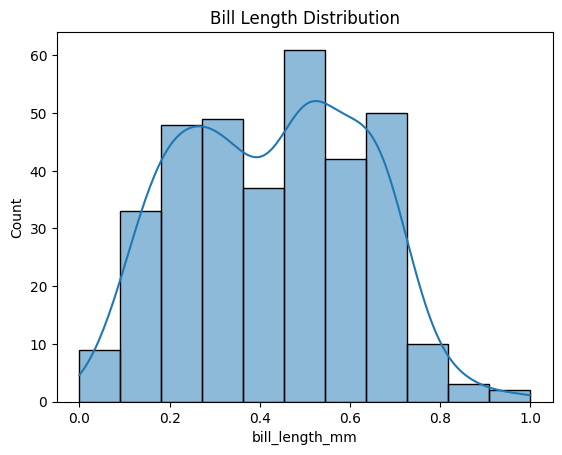

In [22]:
sns.histplot(penguins['bill_length_mm'], kde=True)
plt.title('Bill Length Distribution')
plt.show()

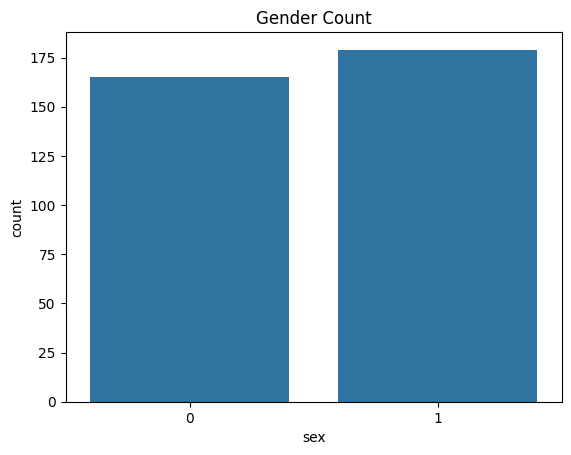

In [23]:
sns.countplot(x='sex', data=penguins)
plt.title('Gender Count')
plt.show()

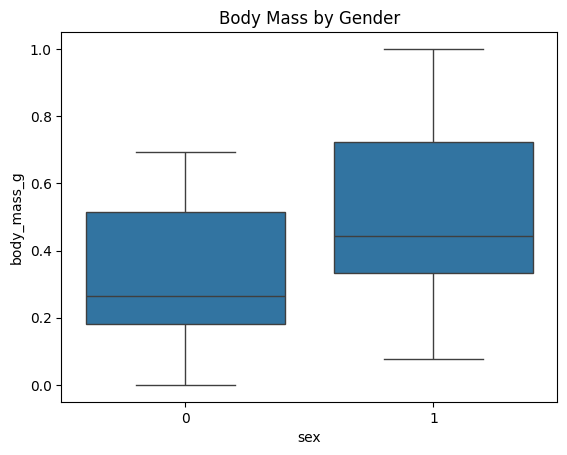

In [24]:
sns.boxplot(x='sex', y='body_mass_g', data=penguins)
plt.title('Body Mass by Gender')
plt.show()

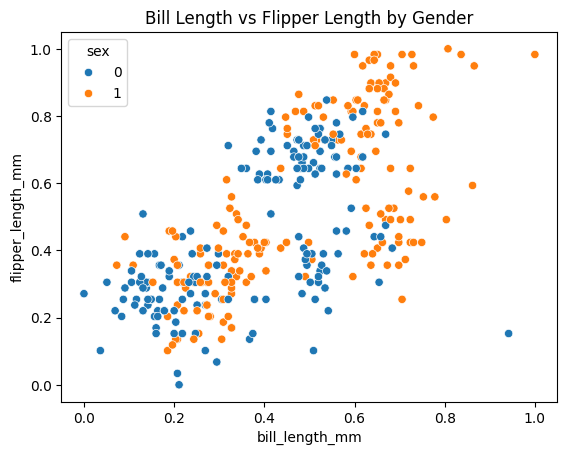

In [25]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='sex', data=penguins)
plt.title('Bill Length vs Flipper Length by Gender')
plt.show()

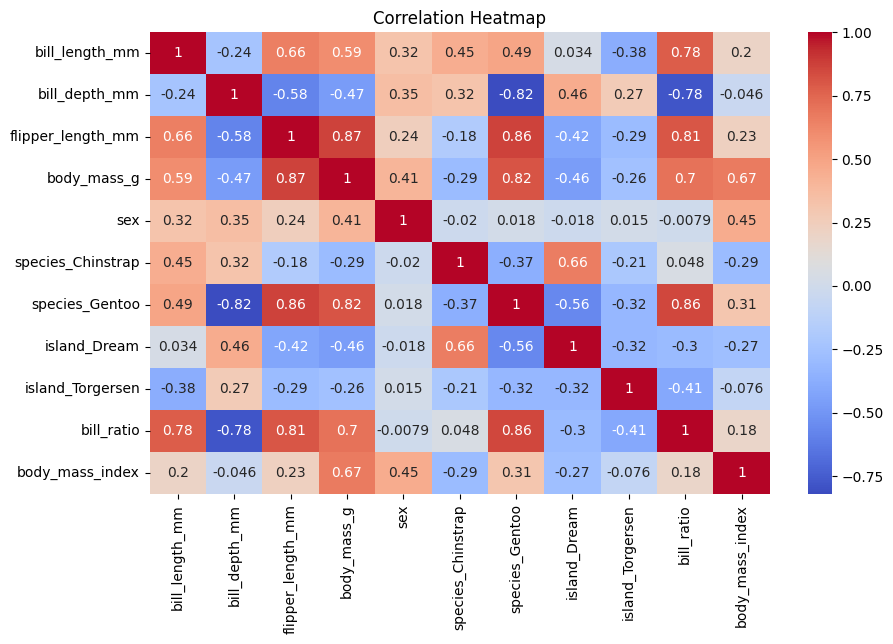

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(penguins.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
import plotly.express as px

In [28]:
fig = px.scatter(penguins, x='bill_length_mm', y='flipper_length_mm',
                 color='sex', title='Bill Length vs Flipper Length (Interactive)',
                 hover_data=['body_mass_g'])
fig.show()

In [29]:
fig = px.box(penguins, x='sex', y='body_mass_g', color='sex', title='Body Mass by Gender')
fig.show()

In [30]:
fig = px.histogram(penguins, x='bill_length_mm', color='sex', nbins=20,
                   title='Distribution of Bill Length by Gender')
fig.show()

In [31]:
fig = px.pie(penguins, names='sex', title='Gender Distribution of Penguins')
fig.show()

In [32]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,bill_ratio,body_mass_index
0,0.254545,18.7,0.152542,0.291667,1,False,False,False,True,2.090909,0.114465
1,0.269091,17.4,0.237288,0.305556,0,False,False,False,True,2.270115,0.109839
2,0.298182,18.0,0.389831,0.152778,0,False,False,False,True,2.238889,0.085470
3,0.449091,17.3,0.423729,0.375000,1,False,False,False,True,2.569364,0.104357
4,0.167273,19.3,0.355932,0.208333,0,False,False,False,True,1.901554,0.092620


In [33]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio,body_mass_index
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.430000,17.152035,0.489702,0.416909,0.520349,2.605438,0.103258
std,0.197956,1.969060,0.237692,0.222138,0.500313,0.495930,0.010134
min,0.000000,13.100000,0.000000,0.000000,0.000000,1.639810,0.073242
25%,0.260909,15.600000,0.305085,0.236111,0.000000,2.161882,0.095799
50%,0.449091,17.300000,0.423729,0.375000,1.000000,2.571484,0.102808
75%,0.596364,18.700000,0.694915,0.569444,1.000000,3.097572,0.109845
max,1.000000,21.500000,1.000000,1.000000,1.000000,3.612676,0.137346
